In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import ast
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from collections import Counter

In [3]:
Movie = pd.read_csv('movie_collection_data_revenuedesc.csv',na_filter=True, na_values=['[]','NaN'])
Movie.head()

Movie_name  Adult  \
0                           Doo   True   
1             Avengers: Endgame  False   
2                        Avatar  False   
3                       Titanic  False   
4  Star Wars: The Force Awakens  False   

                                           GenreList     Budget  Popularity  \
0                                                NaN    3000000       0.600   
1         ['Adventure', 'Science Fiction', 'Action']  356000000     282.089   
2  ['Action', 'Adventure', 'Fantasy', 'Science Fi...  237000000     111.199   
3                               ['Drama', 'Romance']  200000000      90.133   
4  ['Action', 'Adventure', 'Science Fiction', 'Fa...  245000000      58.173   

   VoteAvg  VoteCount                                           Overview  \
0      0.0          0                               Doo takes  Manhattan   
1      8.3      17876  After the devastating events of Avengers: Infi...   
2      7.5      23230  In the 22nd century, a paraplegic Marine is di...   
3      7.9      19032  101-year-old Rose DeWitt Bukater tells the sto...   
4      7.4      15704  Thirty years after defeating the Galactic Empi...   

                                     Tagline       Revenue ReleaseDate  \
0                                        NaN  540000000000         NaN   
1            Part of the journey is the end.    2797800564  2019-04-24   
2                Enter the World of Pandora.    2787965087  2009-12-10   
3  Nothing on Earth could come between them.    2187463944  1997-11-18   
4              Every generation has a story.    2068223624  2015-12-15   

   Runtime OriginalLanguage  \
0    300.0               en   
1    181.0               en   
2    162.0               en   
3    194.0               en   
4    136.0               en   

                                   ProductionCompany ProductionCountry  \
0                                                NaN               NaN   
1                                 ['Marvel Studios']            ['US']   
2  ['Dune Entertainment', 'Lightstorm Entertainme...      ['US', 'GB']   
3  ['Paramount', 'Lightstorm Entertainment', '20t...            ['US']   
4                    ['Lucasfilm Ltd.', 'Bad Robot']            ['US']   

                         SpokenLanguage  
0                                ['ba']  
1                    ['en', 'ja', 'xh']  
2                          ['en', 'es']  
3  ['en', 'fr', 'de', 'sv', 'it', 'ru']  
4                                ['en']

# Dropping invalid Data

In [4]:
## Drop INVALID DATA
Numericlist = ['Budget','Popularity','VoteAvg','VoteCount','Revenue','Runtime']
for item in Numericlist:
    Movie[str(item)] = pd.to_numeric(Movie[str(item)], errors='coerce').fillna(0)
Movie_CleanedData = Movie.dropna(subset=['ReleaseDate','SpokenLanguage','ProductionCompany','ProductionCountry','GenreList'])
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Budget']<281)]
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Revenue']==0)]
Movie_CleanedData.drop_duplicates(subset="Movie_name", inplace =True)
Movie_CleanedData.index = pd.RangeIndex(len(Movie_CleanedData.index))
Movie_CleanedData.index = range(len(Movie_CleanedData.index))



In [5]:
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_name         6712 non-null   object 
 1   Adult              6712 non-null   bool   
 2   GenreList          6712 non-null   object 
 3   Budget             6712 non-null   int64  
 4   Popularity         6712 non-null   float64
 5   VoteAvg            6712 non-null   float64
 6   VoteCount          6712 non-null   int64  
 7   Overview           6696 non-null   object 
 8   Tagline            5570 non-null   object 
 9   Revenue            6712 non-null   int64  
 10  ReleaseDate        6712 non-null   object 
 11  Runtime            6712 non-null   float64
 12  OriginalLanguage   6712 non-null   object 
 13  ProductionCompany  6712 non-null   object 
 14  ProductionCountry  6712 non-null   object 
 15  SpokenLanguage     6712 non-null   object 
dtypes: bool(1), float64(3), 

## Calculate and Insert Profit Variable

In [6]:
Profit=[]
for i in range(len(Movie_CleanedData)):
    Profit.append(Movie_CleanedData.loc[i,'Revenue']-Movie_CleanedData.loc[i,'Budget'])
Movie_CleanedData.insert(10,"Profit",Profit,True)

## Create new column for release year and month

In [7]:
Movie_CleanedData['Year'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).year
Movie_CleanedData['Month'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).month

In [8]:
#change string in list format to list
for i in range(len(Movie_CleanedData)):
    x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
    Movie_CleanedData.at[i,'GenreList'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCompany'])
    Movie_CleanedData.at[i,'ProductionCompany'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCountry'])
    Movie_CleanedData.at[i,'ProductionCountry'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'SpokenLanguage'])
    Movie_CleanedData.at[i,'SpokenLanguage'] = x

In [9]:
Movie_CleanedData.head(1000)

Movie_name  Adult  \
0                                    Avengers: Endgame  False   
1                                               Avatar  False   
2                                              Titanic  False   
3                         Star Wars: The Force Awakens  False   
4                               Avengers: Infinity War  False   
5                                       Jurassic World  False   
6                                        The Lion King  False   
7                                         The Avengers  False   
8                                            Furious 7  False   
9                                            Frozen II  False   
10                             Avengers: Age of Ultron  False   
11                                       Black Panther  False   
12        Harry Potter and the Deathly Hallows: Part 2  False   
13                            Star Wars: The Last Jedi  False   
14                      Jurassic World: Fallen Kingdom  False   
15                                              Frozen  False   
16                                Beauty and the Beast  False   
17                                       Incredibles 2  False   
18                             The Fate of the Furious  False   
19                                          Iron Man 3  False   
20                                             Minions  False   
21                          Captain America: Civil War  False   
22                                             Aquaman  False   
23                           Spider-Man: Far from Home  False   
24                                      Captain Marvel  False   
25                      Transformers: Dark of the Moon  False   
26       The Lord of the Rings: The Return of the King  False   
27                                             Skyfall  False   
28                               The Dark Knight Rises  False   
29                                               Joker  False   
30                    Star Wars: The Rise of Skywalker  False   
31                                         Toy Story 4  False   
32                                         Toy Story 3  False   
33          Pirates of the Caribbean: Dead Man's Chest  False   
34                        Rogue One: A Star Wars Story  False   
35                                             Aladdin  False   
36         Pirates of the Caribbean: On Stranger Tides  False   
37                                     Despicable Me 3  False   
38                                        Finding Dory  False   
39                                 Alice in Wonderland  False   
40                                            Zootopia  False   
41                   The Hobbit: An Unexpected Journey  False   
42                                     The Dark Knight  False   
43            Harry Potter and the Philosopher's Stone  False   
44                                     Despicable Me 2  False   
45                                     The Jungle Book  False   
46                      Jumanji: Welcome to the Jungle  False   
47            Pirates of the Caribbean: At World's End  False   
48                 The Hobbit: The Desolation of Smaug  False   
49           The Hobbit: The Battle of the Five Armies  False   
50        Harry Potter and the Deathly Hallows: Part 1  False   
51                                        Finding Nemo  False   
52           Harry Potter and the Order of the Phoenix  False   
53              Harry Potter and the Half-Blood Prince  False   
54                                             Shrek 2  False   
55               The Lord of the Rings: The Two Towers  False   
56           Star Wars: Episode I - The Phantom Menace  False   
57                                       Jurassic Park  False   
58                 Harry Potter and the Goblet of Fire  False   
59                                   Bohemian Rhapsody  False   
60                                        Spider-Man 3  False   
61            

In [10]:
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_name         6712 non-null   object 
 1   Adult              6712 non-null   bool   
 2   GenreList          6712 non-null   object 
 3   Budget             6712 non-null   int64  
 4   Popularity         6712 non-null   float64
 5   VoteAvg            6712 non-null   float64
 6   VoteCount          6712 non-null   int64  
 7   Overview           6696 non-null   object 
 8   Tagline            5570 non-null   object 
 9   Revenue            6712 non-null   int64  
 10  Profit             6712 non-null   int64  
 11  ReleaseDate        6712 non-null   object 
 12  Runtime            6712 non-null   float64
 13  OriginalLanguage   6712 non-null   object 
 14  ProductionCompany  6712 non-null   object 
 15  ProductionCountry  6712 non-null   object 
 16  SpokenLanguage     6712 

## Create Columns for Categorical Data


In [11]:
# #change string in list format to list
# for i in range(len(Movie_CleanedData)):
#     x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
#     Movie_CleanedData.at[i,'GenreList'] = x
    
#     x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCompany'])
#     Movie_CleanedData.at[i,'ProductionCompany'] = x
    
#     x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCountry'])
#     Movie_CleanedData.at[i,'ProductionCountry'] = x
    
#     x = ast.literal_eval(Movie_CleanedData.loc[i,'SpokenLanguage'])
#     Movie_CleanedData.at[i,'SpokenLanguage'] = x

    
# #count max number each category, to create number of columns
# genrecount,production_company_count,production_country_count,spoken_language_count = 0,0,0,0

# for i in range(len(Movie_CleanedData)):
#     if len(Movie_CleanedData.loc[i,'GenreList'])>genrecount:
#         genrecount = len(Movie_CleanedData.loc[i,'GenreList'])
#     if len(Movie_CleanedData.loc[i,'ProductionCompany'])>production_company_count:
#         production_company_count = len(Movie_CleanedData.loc[i,'ProductionCompany'])
#     if len(Movie_CleanedData.loc[i,'ProductionCountry'])>production_country_count:
#         production_country_count = len(Movie_CleanedData.loc[i,'ProductionCountry'])
#     if len(Movie_CleanedData.loc[i,'SpokenLanguage'])>spoken_language_count:
#         spoken_language_count = len(Movie_CleanedData.loc[i,'SpokenLanguage'])
        
       
# print(genrecount)
# print(production_company_count)
# print(production_country_count)
# print(spoken_language_count)
        
# #to catch and ignore list out of index, replace with NONE.
# def catch(var,i):
#     try:
#         return var[i]
#     except Exception as e:
#         return None
# def catch2(var,i):
#     try:
#         return var[i][0]
#     except Exception as e:
#         return None
    
# #replace
# for i in range(1,genrecount+1):
#     Movie_CleanedData.loc[:, 'Genre'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.GenreList]
    
# for i in range(1,production_company_count+1):
#     Movie_CleanedData.loc[:, 'ProductionCompany'+str(i)] = [catch2(x, i-1) for x in Movie_CleanedData.ProductionCompany]
    
# for i in range(1,production_country_count+1):    
#     Movie_CleanedData.loc[:, 'ProductionCountry'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.ProductionCountry]

# for i in range(1,spoken_language_count+1):    
#     Movie_CleanedData.loc[:, 'SpokenLanguage'+str(i)] = [catch(x, i-1) for x in Movie_CleanedData.SpokenLanguage]

In [12]:
Movie_CleanedData.describe()

Budget   Popularity      VoteAvg     VoteCount       Revenue  \
count  6.712000e+03  6712.000000  6712.000000   6712.000000  6.712000e+03   
mean   2.951153e+07    22.642649     6.413141   1620.206645  8.649503e+07   
std    4.162939e+07    86.670472     1.009927   2771.984237  1.714252e+08   
min    4.000000e+02     0.600000     0.000000      0.000000  3.436170e+05   
25%    4.919081e+06     9.154750     5.900000    138.000000  6.509003e+06   
50%    1.500000e+07    13.955000     6.500000    581.500000  2.555007e+07   
75%    3.600000e+07    21.996000     7.100000   1765.000000  9.000000e+07   
max    9.653130e+08  6065.197000    10.000000  28861.000000  2.797801e+09   

             Profit     Runtime         Year        Month  
count  6.712000e+03  6712.00000  6712.000000  6712.000000  
mean   5.698349e+07   111.04857  2001.327324     6.884535  
std    1.449252e+08    23.22343    16.394408     3.418278  
min   -9.635208e+08     0.00000  1913.000000     1.000000  
25%   -5.891075e+05    96.00000  1995.000000     4.000000  
50%    9.204050e+06   107.00000  2006.000000     7.000000  
75%    5.500505e+07   122.00000  2013.000000    10.000000  
max    2.550965e+09   339.00000  2021.000000    12.000000

## EXPLORATORY ANALYSIS

## Numeric Data

In [13]:
Q1 = np.quantile(Movie_CleanedData.VoteCount, 0.25)
mean = np.quantile(Movie_CleanedData.VoteCount, 0.5)
mean_Avg = np.quantile(Movie_CleanedData.VoteAvg, 0.5)
for i in range(len(Movie_CleanedData)):
    if Movie_CleanedData.VoteCount[i]<Q1:
        Movie_CleanedData.VoteCount[i] = mean
        Movie_CleanedData.VoteAvg[i]= mean_Avg
#     if Movie_CleanedData.loc[i,'VoteCount']<Q1:
#         Movie_CleanedData.loc[i,'VoteCount'] = mean
#         Movie_CleanedData.loc[i,'VoteAvg'] = mean_Avg

C:\Users\huang\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\huang\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [14]:
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6712 entries, 0 to 6711
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_name         6712 non-null   object 
 1   Adult              6712 non-null   bool   
 2   GenreList          6712 non-null   object 
 3   Budget             6712 non-null   int64  
 4   Popularity         6712 non-null   float64
 5   VoteAvg            6712 non-null   float64
 6   VoteCount          6712 non-null   int64  
 7   Overview           6696 non-null   object 
 8   Tagline            5570 non-null   object 
 9   Revenue            6712 non-null   int64  
 10  Profit             6712 non-null   int64  
 11  ReleaseDate        6712 non-null   object 
 12  Runtime            6712 non-null   float64
 13  OriginalLanguage   6712 non-null   object 
 14  ProductionCompany  6712 non-null   object 
 15  ProductionCountry  6712 non-null   object 
 16  SpokenLanguage     6712 

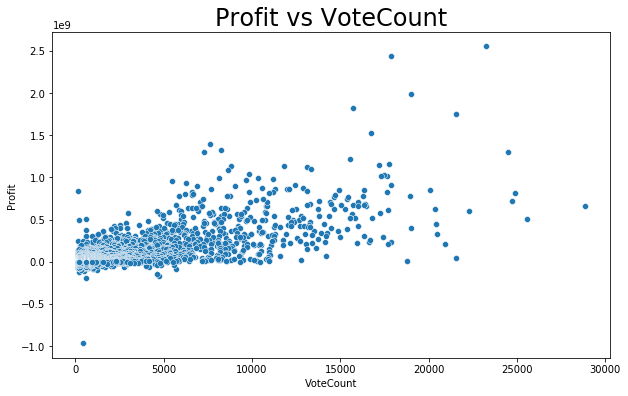

In [15]:
#Plotting VoteCount versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Profit vs VoteCount", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteCount", y="Profit")

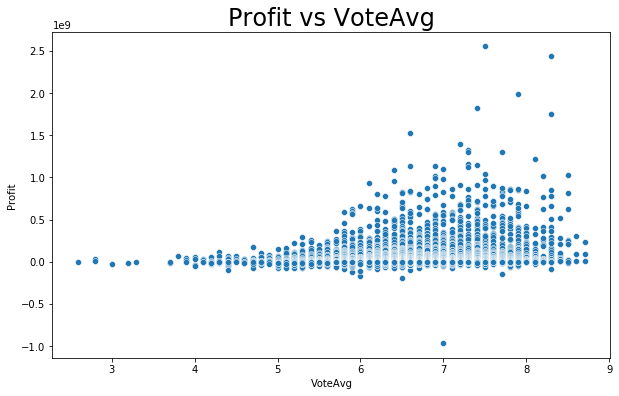

In [16]:
#Plotting VoteAvg versus Profit
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title("Profit vs VoteAvg", size=24)
sb.scatterplot(data=Movie_CleanedData, x="VoteAvg", y="Profit")

In [17]:
NumericData =pd.DataFrame(Movie_CleanedData[['Budget','Popularity','VoteAvg','VoteCount','Revenue','Profit','Runtime','Year','Month']])
NumericData.head()

Budget  Popularity  VoteAvg  VoteCount     Revenue      Profit  Runtime  \
0  356000000     282.089      8.3      17876  2797800564  2441800564    181.0   
1  237000000     111.199      7.5      23230  2787965087  2550965087    162.0   
2  200000000      90.133      7.9      19032  2187463944  1987463944    194.0   
3  245000000      58.173      7.4      15704  2068223624  1823223624    136.0   
4  300000000     320.103      8.3      21555  2046239637  1746239637    149.0   

   Year  Month  
0  2019      4  
1  2009     12  
2  1997     11  
3  2015     12  
4  2018      4

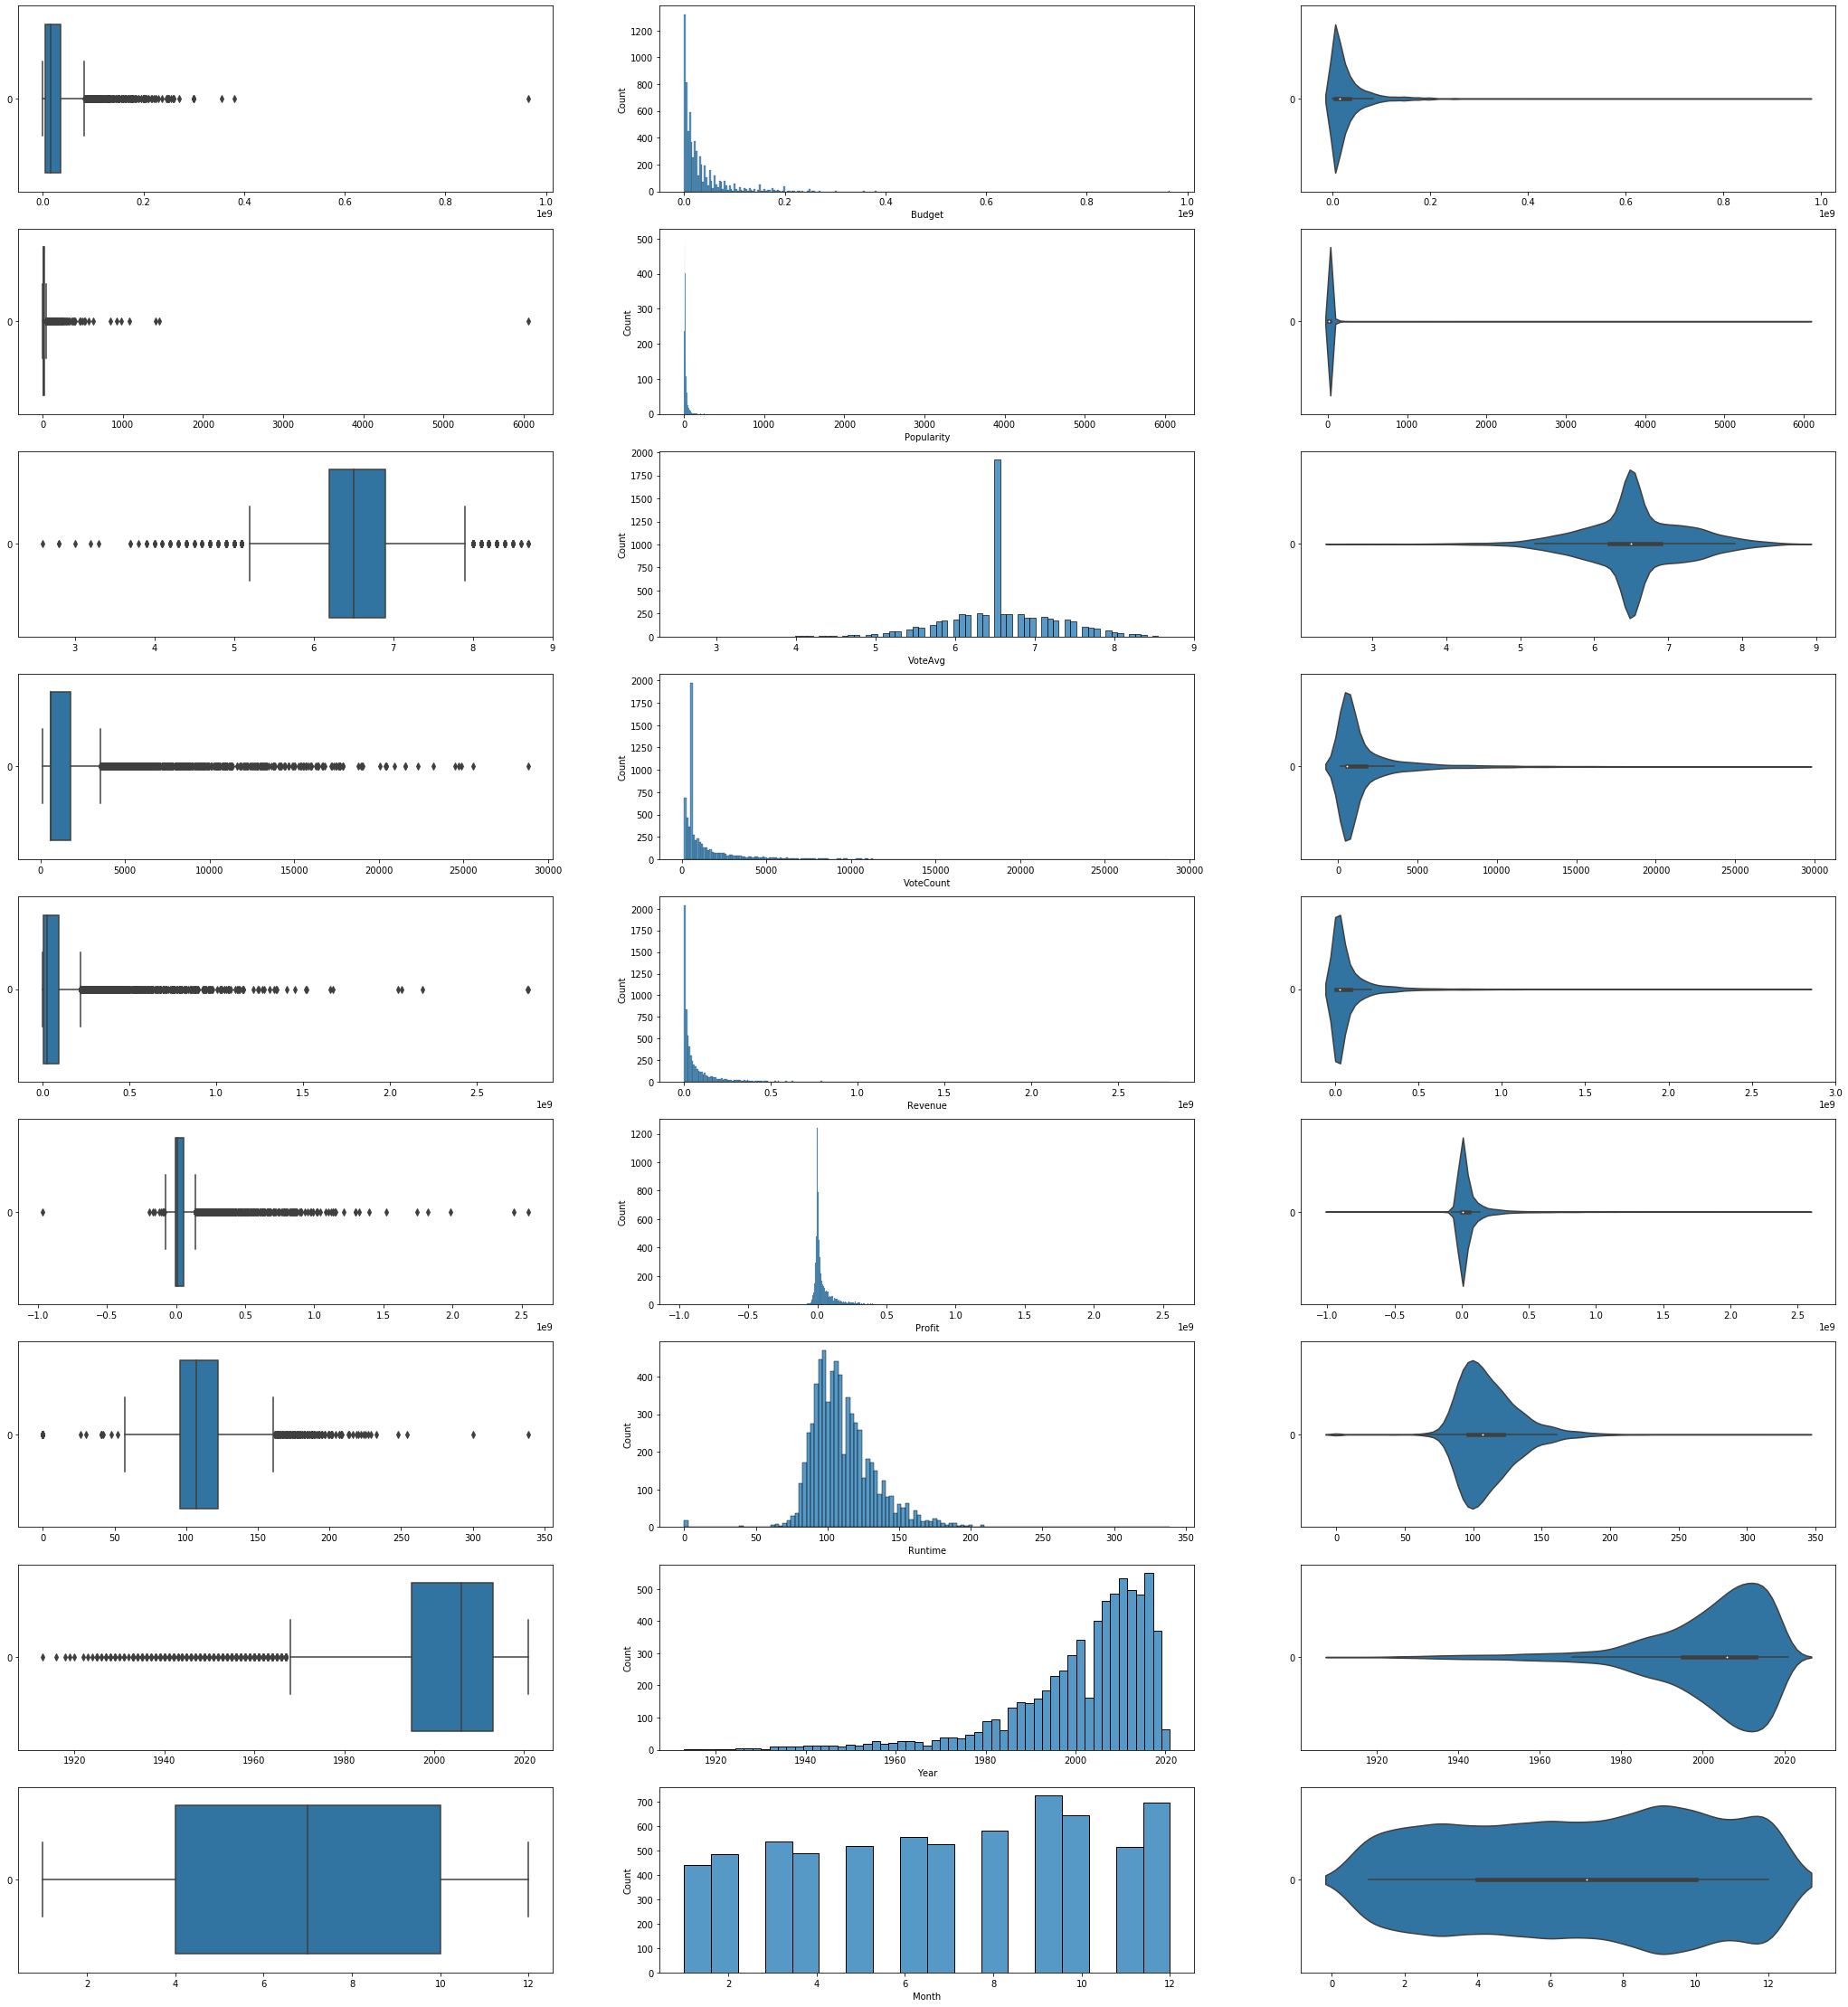

In [18]:
f, axes = plt.subplots(9, 3, figsize=(36, 40))

count = 0
for var in NumericData:
    sb.boxplot(data = NumericData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = NumericData[var], ax = axes[count,1])
    sb.violinplot(data = NumericData[var], orient = "h", ax = axes[count,2])
    count += 1

              Budget  Popularity   VoteAvg  VoteCount   Revenue    Profit  \
Budget      1.000000    0.196472 -0.018851   0.552098  0.708789  0.551146   
Popularity  0.196472    1.000000  0.079181   0.174862  0.181020  0.157684   
VoteAvg    -0.018851    0.079181  1.000000   0.366026  0.174644  0.211993   
VoteCount   0.552098    0.174862  0.366026   1.000000  0.760558  0.741040   
Revenue     0.708789    0.181020  0.174644   0.760558  1.000000  0.979255   
Profit      0.551146    0.157684  0.211993   0.741040  0.979255  1.000000   
Runtime     0.135163    0.013692  0.295888   0.167162  0.154626  0.144074   
Year        0.219788    0.092380 -0.154742   0.152989  0.151690  0.116294   
Month       0.032337   -0.004569  0.104135   0.033851  0.032491  0.029143   

             Runtime      Year     Month  
Budget      0.135163  0.219788  0.032337  
Popularity  0.013692  0.092380 -0.004569  
VoteAvg     0.295888 -0.154742  0.104135  
VoteCount   0.167162  0.152989  0.033851  
Revenue     0.

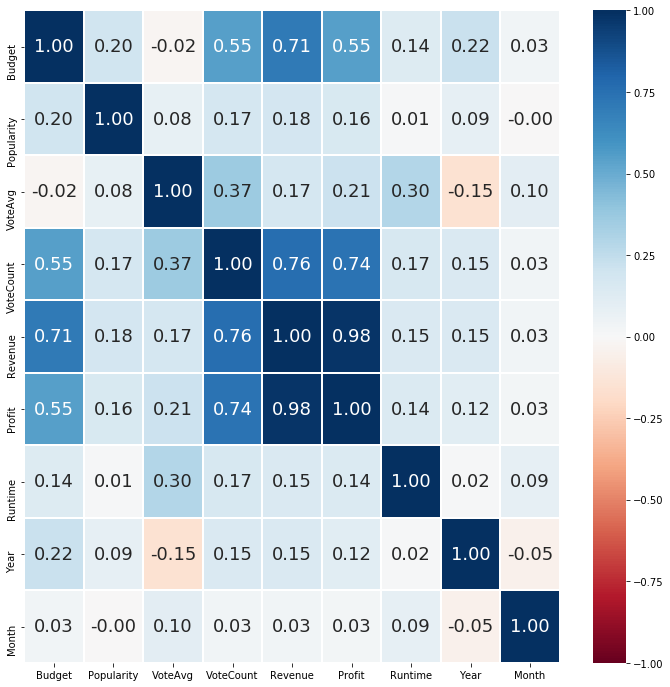

In [19]:

# Correlation Matrix
print(NumericData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(NumericData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

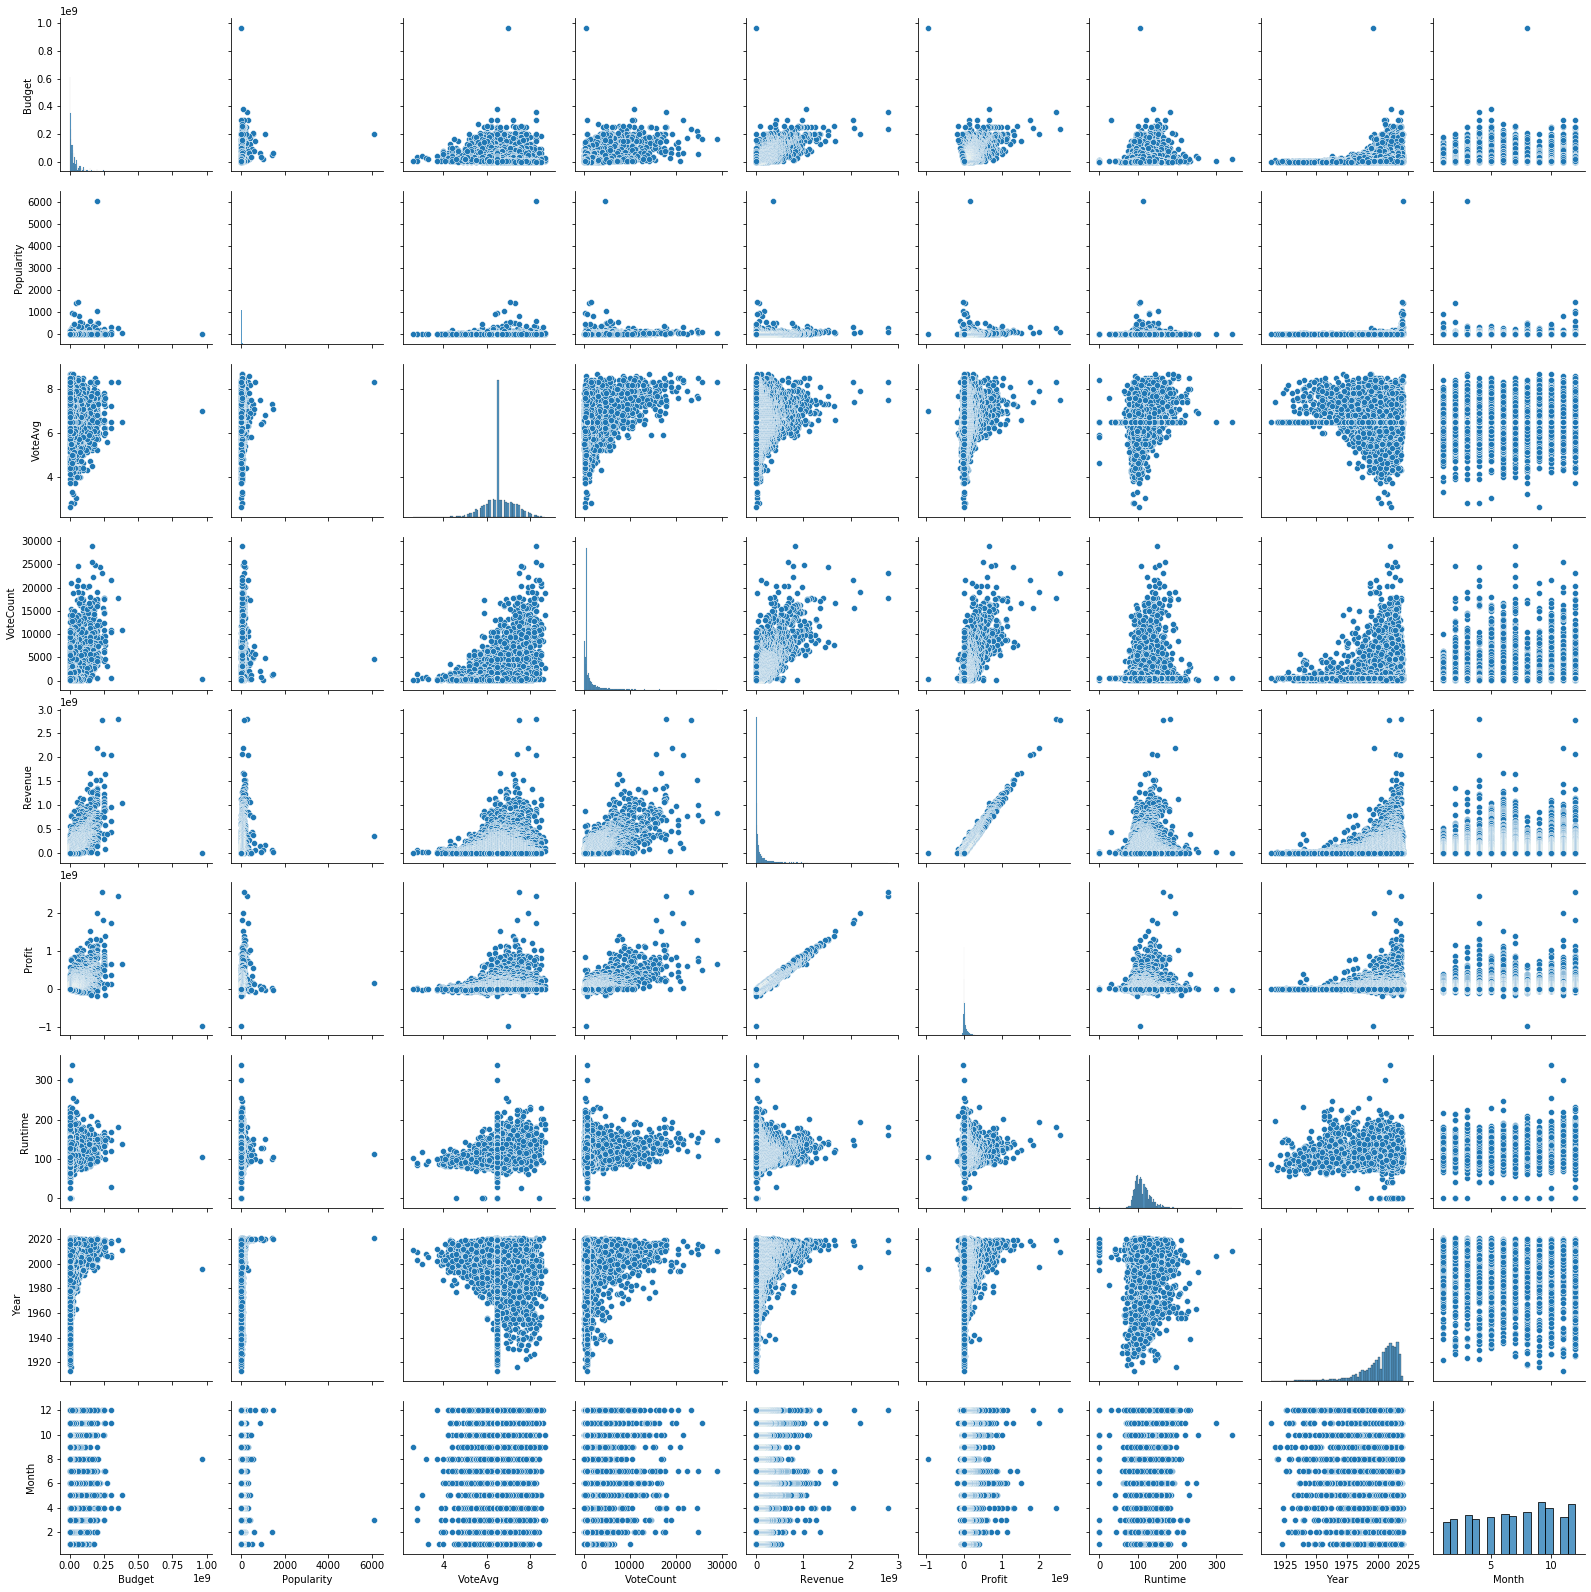

In [20]:
sb.pairplot(data = NumericData)

## Categorical Data

In [21]:
Genre = Movie_CleanedData.set_index('Movie_name').GenreList.apply(pd.Series).stack()
Genre = pd.get_dummies(Genre).groupby(level=0).sum()
Genre = Genre.replace(0,np.nan)
Movie_CleanedData = Movie_CleanedData.set_index('Movie_name')
Genre['Profit'] = Movie_CleanedData.Profit
Genre['Year'] = Movie_CleanedData.Year

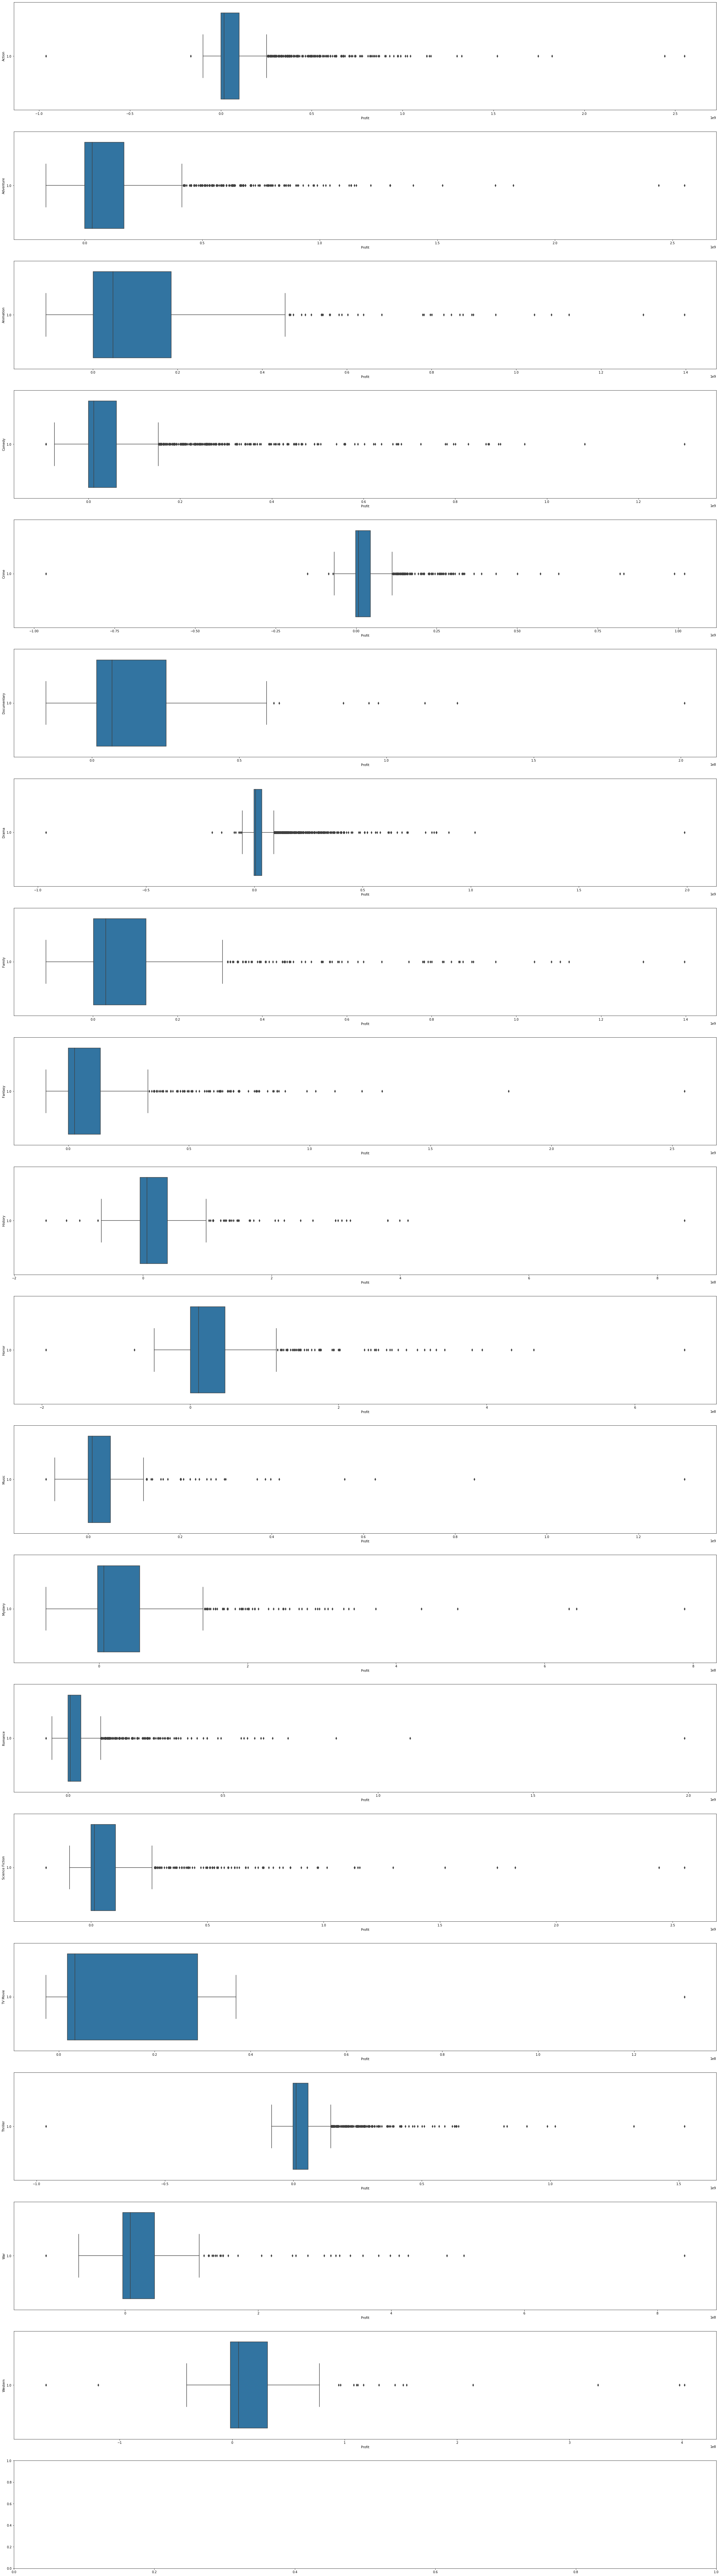

In [22]:
f, axes = plt.subplots(len(Genre.columns)-1, 1, figsize=(40, 150))
count = 0
for var in Genre.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = Genre[var], x = Genre['Profit'], orient = "h", ax = axes[count])
    count+=1

In [23]:
df = Genre.melt(id_vars=['Year',"Profit"], var_name="Genre",value_name="Value")
df = df.sample(frac=0.25,axis='rows')

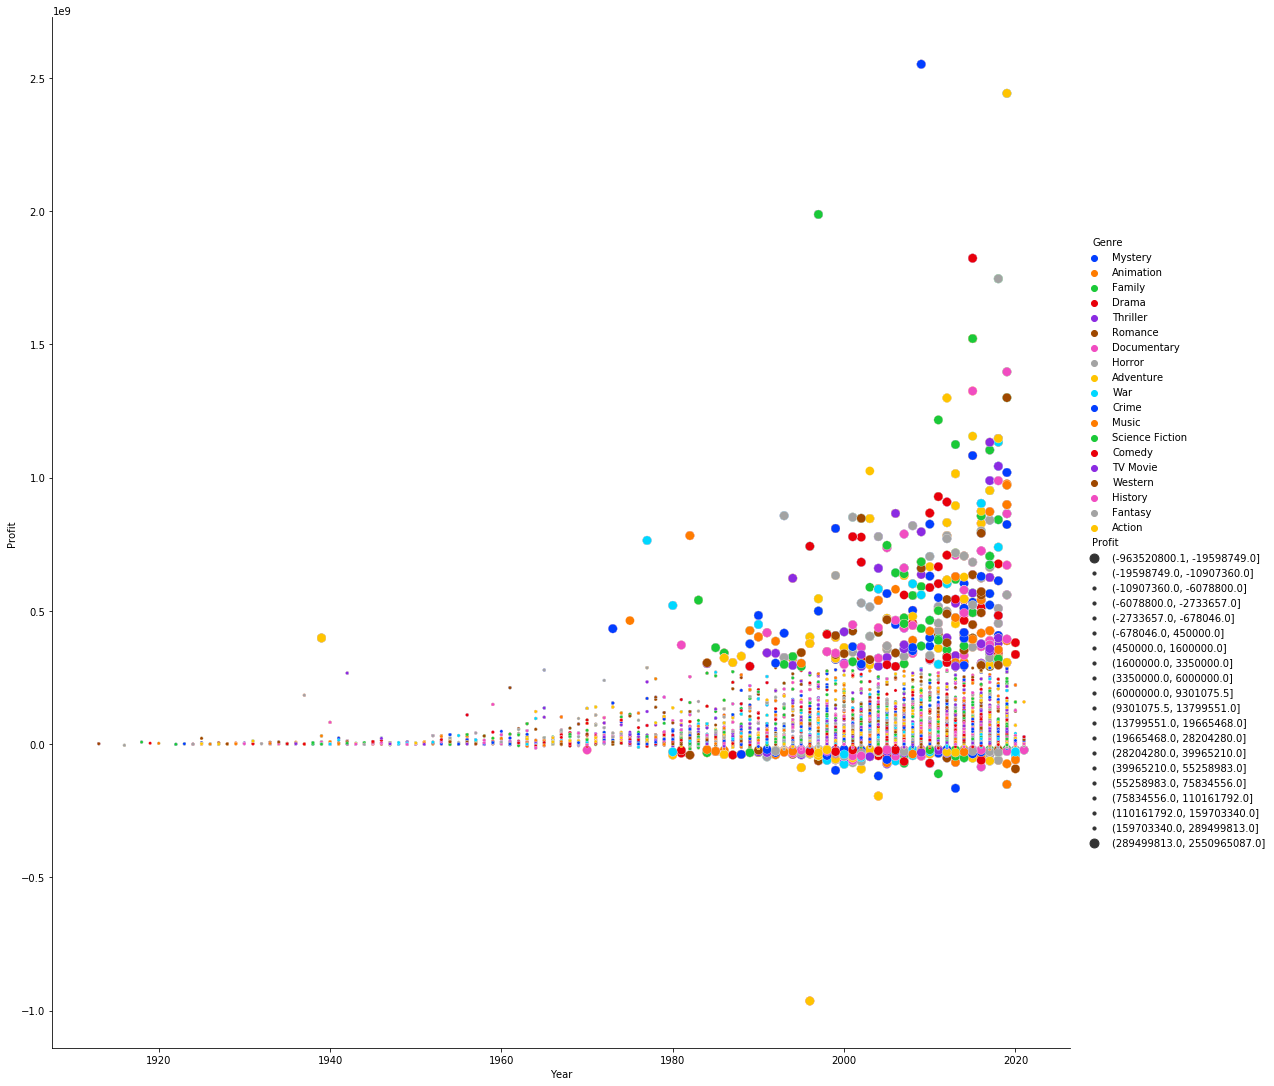

In [24]:
sb.relplot(x=df['Year'],y=df['Profit'],hue=df['Genre'], size = pd.qcut(df["Profit"], 20, precision=1),
                sizes=[80,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,80], palette="bright", height = 15)


### For the remaining categories, there are too many different categories to consider directly. There are over 7000 unique companies, 30+ different countries and languages. 

### To deal with this overload of categorical data, we bin the companies into 4 categories based on their movie count frequency. The top 8 Spoken Languages and Production Countries will be extracted for comparison, the rest will be discarded.

In [25]:
ProComDic ={}
ProCounDic = {}
SpoLangDic = {}
for i in range(len(Movie_CleanedData)):
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCompany[i][j] not in ProComDic: #if genre is not in dictionary, initialize genre: 1
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j])] = 1
        elif Movie_CleanedData.ProductionCompany[i][j] in ProComDic:
            ProComDic[str(Movie_CleanedData.ProductionCompany[i][j])] +=1
    for j in range(len(Movie_CleanedData.ProductionCountry[i])): #every element in genrelist
        if Movie_CleanedData.ProductionCountry[i][j] not in ProCounDic: #if genre is not in dictionary, initialize genre: 1
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] = 1
        elif Movie_CleanedData.ProductionCountry[i][j] in ProCounDic:
            ProCounDic[str(Movie_CleanedData.ProductionCountry[i][j])] +=1
            
    for j in range(len(Movie_CleanedData.SpokenLanguage[i])): #every element in genrelist
        if Movie_CleanedData.SpokenLanguage[i][j] not in SpoLangDic: #if genre is not in dictionary, initialize genre: 1
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] = 1
        elif Movie_CleanedData.SpokenLanguage[i][j] in SpoLangDic:
            SpoLangDic[str(Movie_CleanedData.SpokenLanguage[i][j])] +=1

In [26]:
k = Counter(SpoLangDic)
l = Counter(ProCounDic)
SpoLangDic = k.most_common(8) 
ProCounDic = l.most_common(8)
TopLang = [x[0] for x in SpoLangDic]
TopCoun = [x[0] for x in ProCounDic]

## Production Company Analysis

In [27]:
others = [x[0] for x in ProComDic.items() if x[1]<=20]
small = [x[0] for x in ProComDic.items() if 20<x[1]<=50]
medium = [x[0] for x in ProComDic.items() if 50<x[1]<=150]
large = [x[0] for x in ProComDic.items() if 150<x[1]]        

In [28]:
for i in range(len(Movie_CleanedData)):
    for j in range(len(Movie_CleanedData.ProductionCompany[i])): #every element in list
        if Movie_CleanedData.ProductionCompany[i][j] in others: 
            Movie_CleanedData.ProductionCompany[i][j] = "Others"
        if Movie_CleanedData.ProductionCompany[i][j] in small: 
            Movie_CleanedData.ProductionCompany[i][j] = "Small"
        if Movie_CleanedData.ProductionCompany[i][j] in medium: 
            Movie_CleanedData.ProductionCompany[i][j] = "Medium"
        if Movie_CleanedData.ProductionCompany[i][j] in large: 
            Movie_CleanedData.ProductionCompany[i][j] = "Large"
            
    for j in range(len(Movie_CleanedData.ProductionCountry[i])):
        if Movie_CleanedData.ProductionCountry[i][j] not in TopCoun:
            Movie_CleanedData.ProductionCountry[i][j] = "Others"
            
    for j in range(len(Movie_CleanedData.SpokenLanguage[i])):
        if Movie_CleanedData.SpokenLanguage[i][j] not in TopLang:
            Movie_CleanedData.SpokenLanguage[i][j] = "Others"
        

In [29]:
ProCom = Movie_CleanedData.ProductionCompany.apply(pd.Series).stack()
ProCom = pd.get_dummies(ProCom).groupby(level=0).sum()
ProCom = ProCom.replace(0,np.nan)
ProCom['Profit'] = Movie_CleanedData.Profit
ProCom['Year'] = Movie_CleanedData.Year
ProCom = ProCom.drop(columns=['Others'])

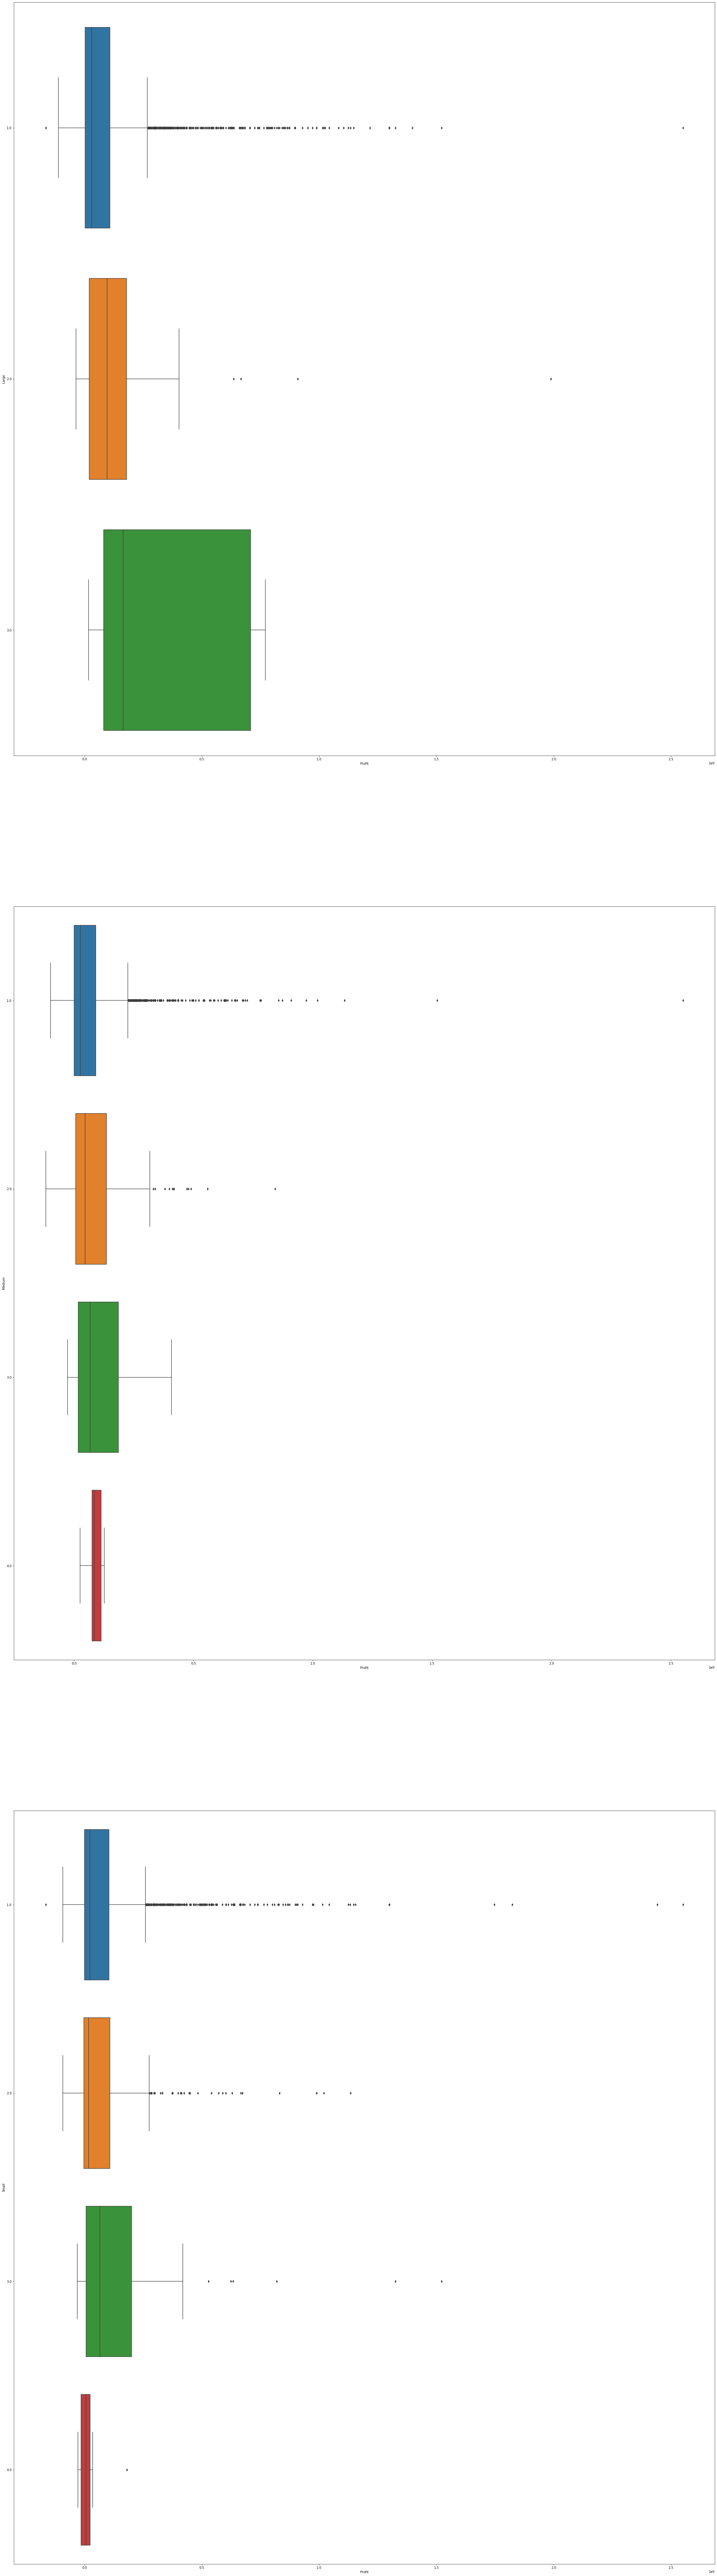

In [30]:
f, axes = plt.subplots(len(ProCom.columns)-2, 1, figsize=(40, 150))
count = 0
for var in ProCom.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = ProCom[var], x = ProCom['Profit'], orient = "h", ax = axes[count])
    count+=1

In [31]:
df2 = ProCom.melt(id_vars=['Year',"Profit"], var_name="ProCom",value_name="Value")
df2 = df2.sample(frac=0.25,axis='rows')

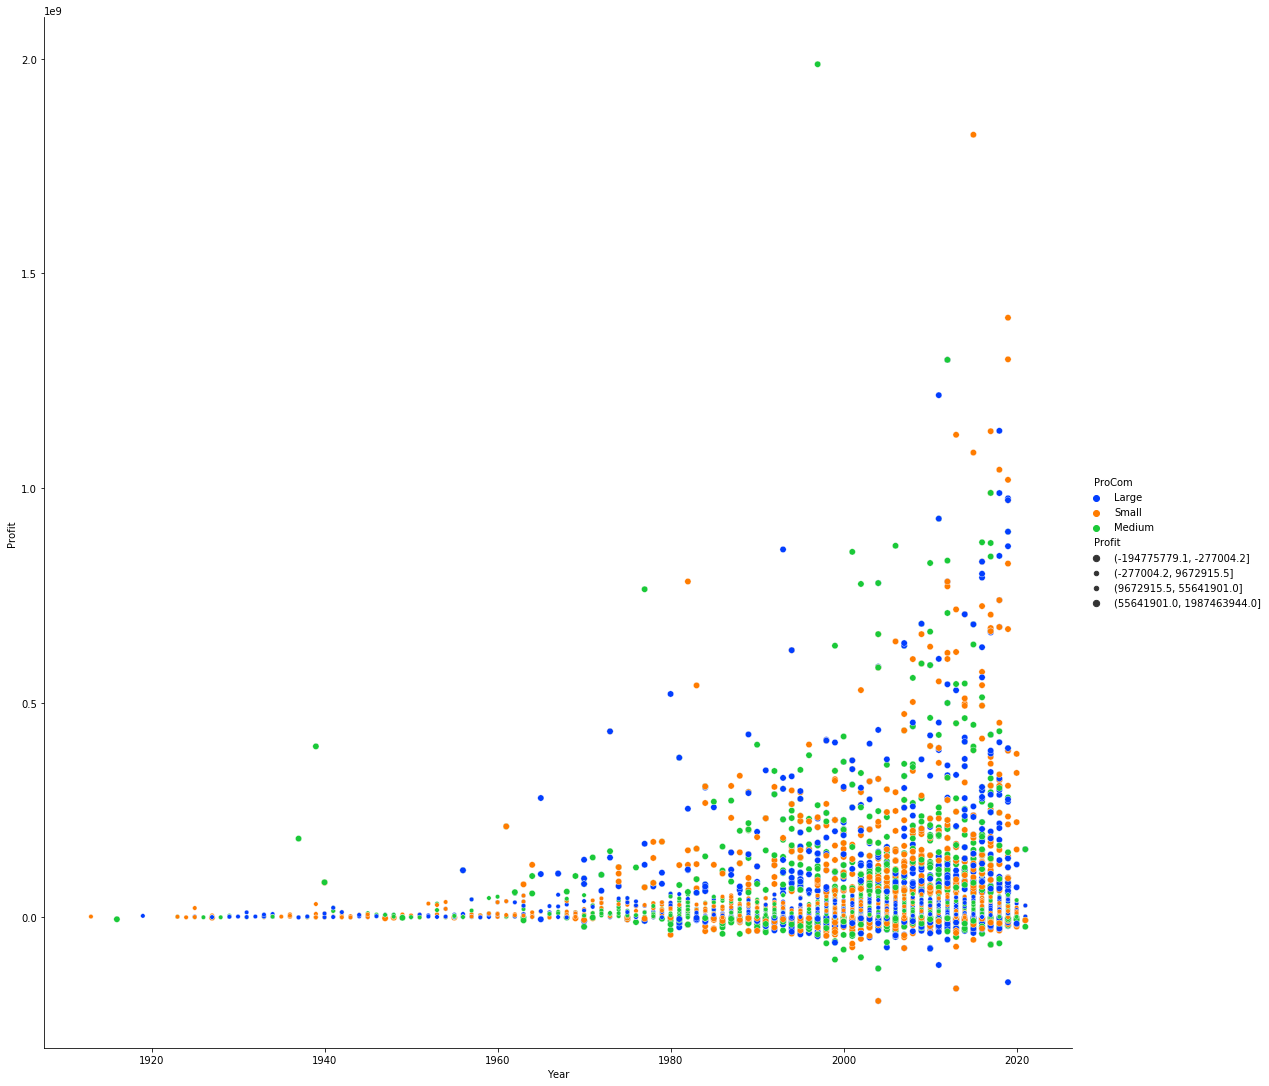

In [32]:
sb.relplot(x=df2['Year'],y=df2['Profit'],hue=df2['ProCom'], size = pd.qcut(df2["Profit"], 4, precision=1),
          sizes=[40,20,20,40],palette="bright", height = 15)


## Production Country Analysis

In [33]:
ProCoun = Movie_CleanedData.ProductionCountry.apply(pd.Series).stack()
ProCoun = pd.get_dummies(ProCoun).groupby(level=0).sum()
ProCoun = ProCoun.replace(0,np.nan)
ProCoun['Profit'] = Movie_CleanedData.Profit
ProCoun['Year'] = Movie_CleanedData.Year
ProCoun = ProCoun.drop(columns=['Others'])
ProCoun.head()

CA   DE  ES  FR   GB  IN  IT   US  \
Movie_name                                                              
#살아있다                              NaN  NaN NaN NaN  NaN NaN NaN  NaN   
'71                                NaN  NaN NaN NaN  1.0 NaN NaN  NaN   
'N Beetje Verliefd                 NaN  NaN NaN NaN  NaN NaN NaN  NaN   
(500) Days of Summer               NaN  NaN NaN NaN  NaN NaN NaN  1.0   
(T)Raumschiff Surprise - Periode 1 NaN  1.0 NaN NaN  NaN NaN NaN  NaN   

                                      Profit  Year  
Movie_name                                          
#살아있다                                7116285  2020  
'71                                 -7800000  2014  
'N Beetje Verliefd                    166214  2006  
(500) Days of Summer                53222734  2009  
(T)Raumschiff Surprise - Periode 1  67341401  2004

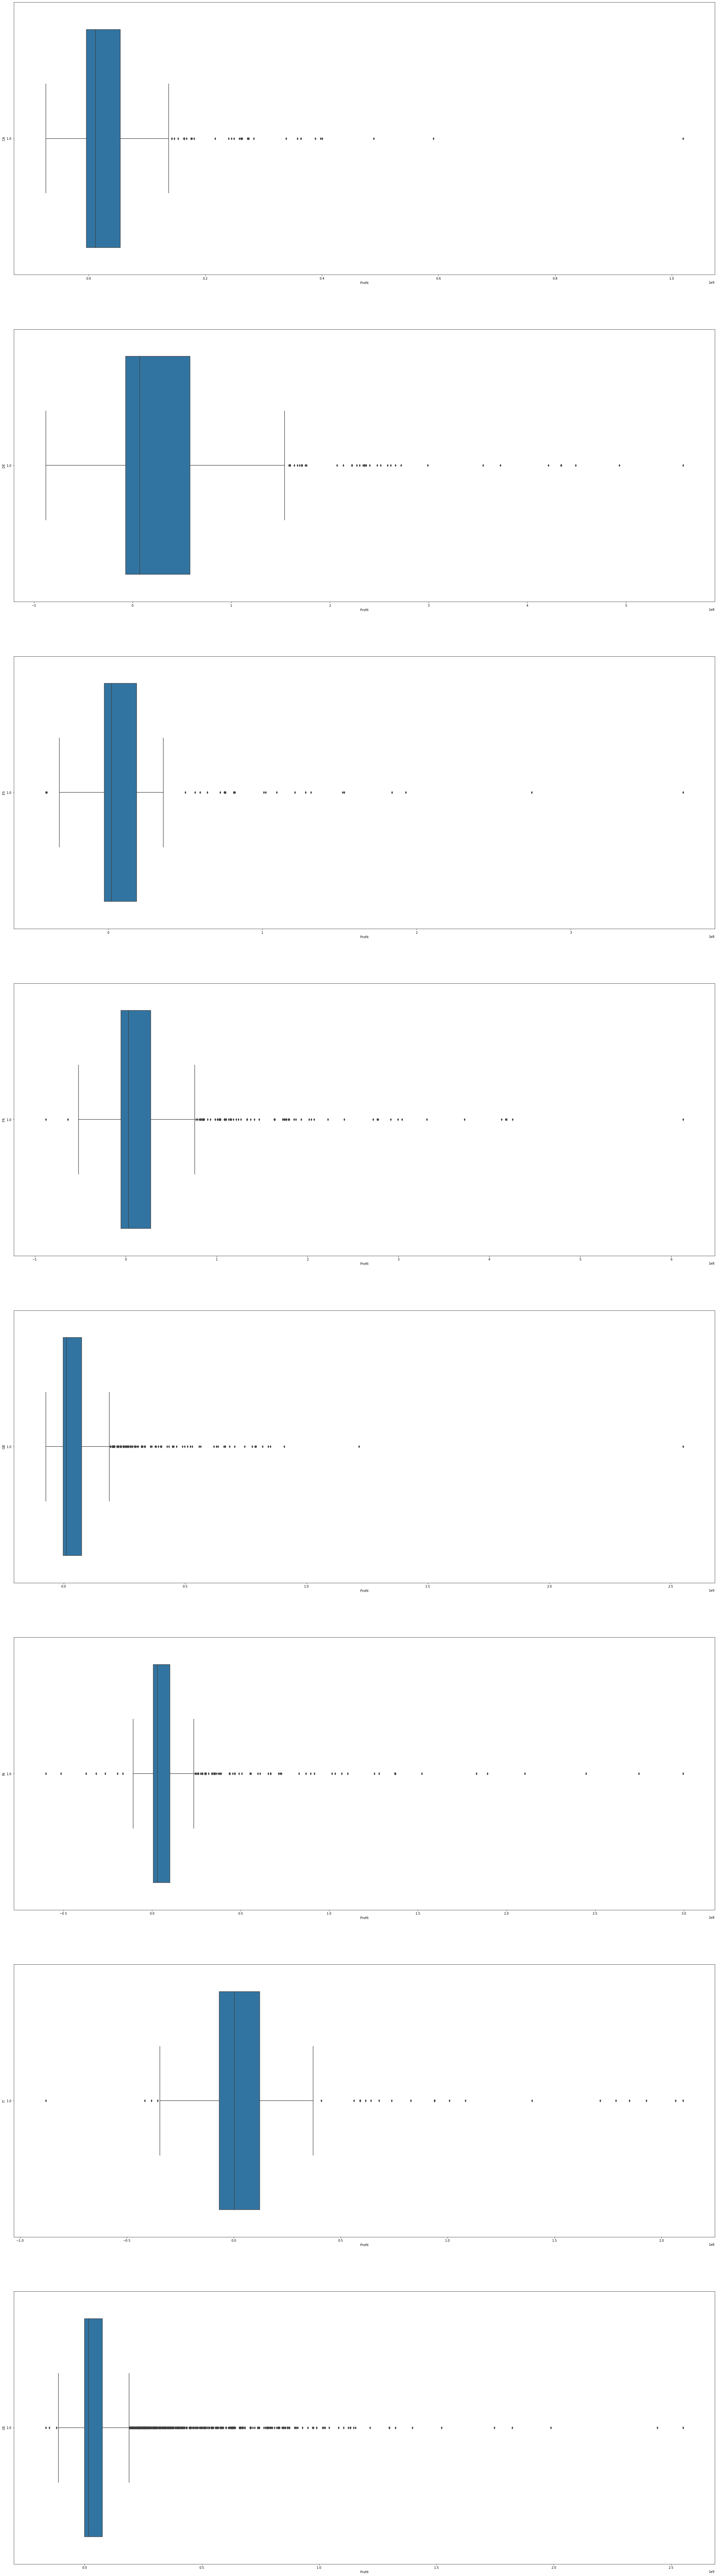

In [34]:
f, axes = plt.subplots(len(ProCoun.columns)-2, 1, figsize=(40, 150))
count = 0
for var in ProCoun.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = ProCoun[var], x = ProCoun['Profit'], orient = "h", ax = axes[count])
    count+=1

In [35]:
df3 = ProCoun.melt(id_vars=['Year',"Profit"], var_name="ProCoun",value_name="Value")
df3 = df3.sample(frac=0.25,axis='rows')

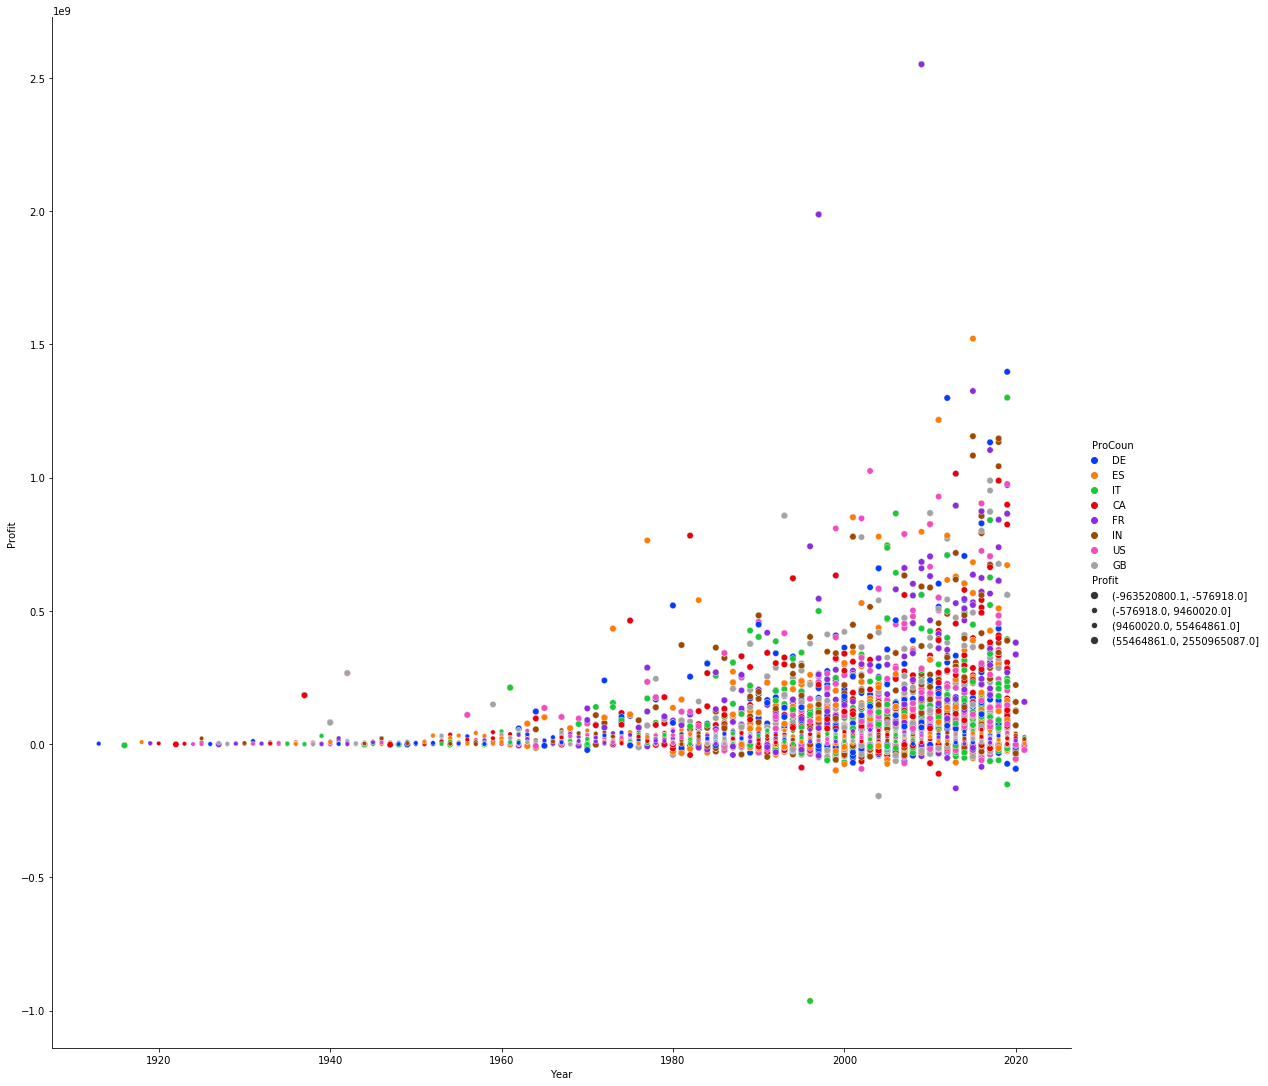

In [36]:
sb.relplot(x=df3['Year'],y=df3['Profit'],hue=df3['ProCoun'], size = pd.qcut(df3["Profit"], 4, precision=1),
          sizes=[40,20,20,40] ,palette="bright", height = 15)

## Spoken Language Analysis

In [37]:
SpoLang = Movie_CleanedData.SpokenLanguage.apply(pd.Series).stack()
SpoLang = pd.get_dummies(SpoLang).groupby(level=0).sum()
SpoLang = SpoLang.replace(0,np.nan)
SpoLang['Profit'] = Movie_CleanedData.Profit
SpoLang['Year'] = Movie_CleanedData.Year
SpoLang = SpoLang.drop(columns=['Others'])
SpoLang.head()

de   en  es   fr  hi  it  ja  ru  \
Movie_name                                                              
#살아있다                               NaN  NaN NaN  NaN NaN NaN NaN NaN   
'71                                 NaN  1.0 NaN  NaN NaN NaN NaN NaN   
'N Beetje Verliefd                  NaN  NaN NaN  NaN NaN NaN NaN NaN   
(500) Days of Summer                NaN  1.0 NaN  1.0 NaN NaN NaN NaN   
(T)Raumschiff Surprise - Periode 1  1.0  NaN NaN  NaN NaN NaN NaN NaN   

                                      Profit  Year  
Movie_name                                          
#살아있다                                7116285  2020  
'71                                 -7800000  2014  
'N Beetje Verliefd                    166214  2006  
(500) Days of Summer                53222734  2009  
(T)Raumschiff Surprise - Periode 1  67341401  2004

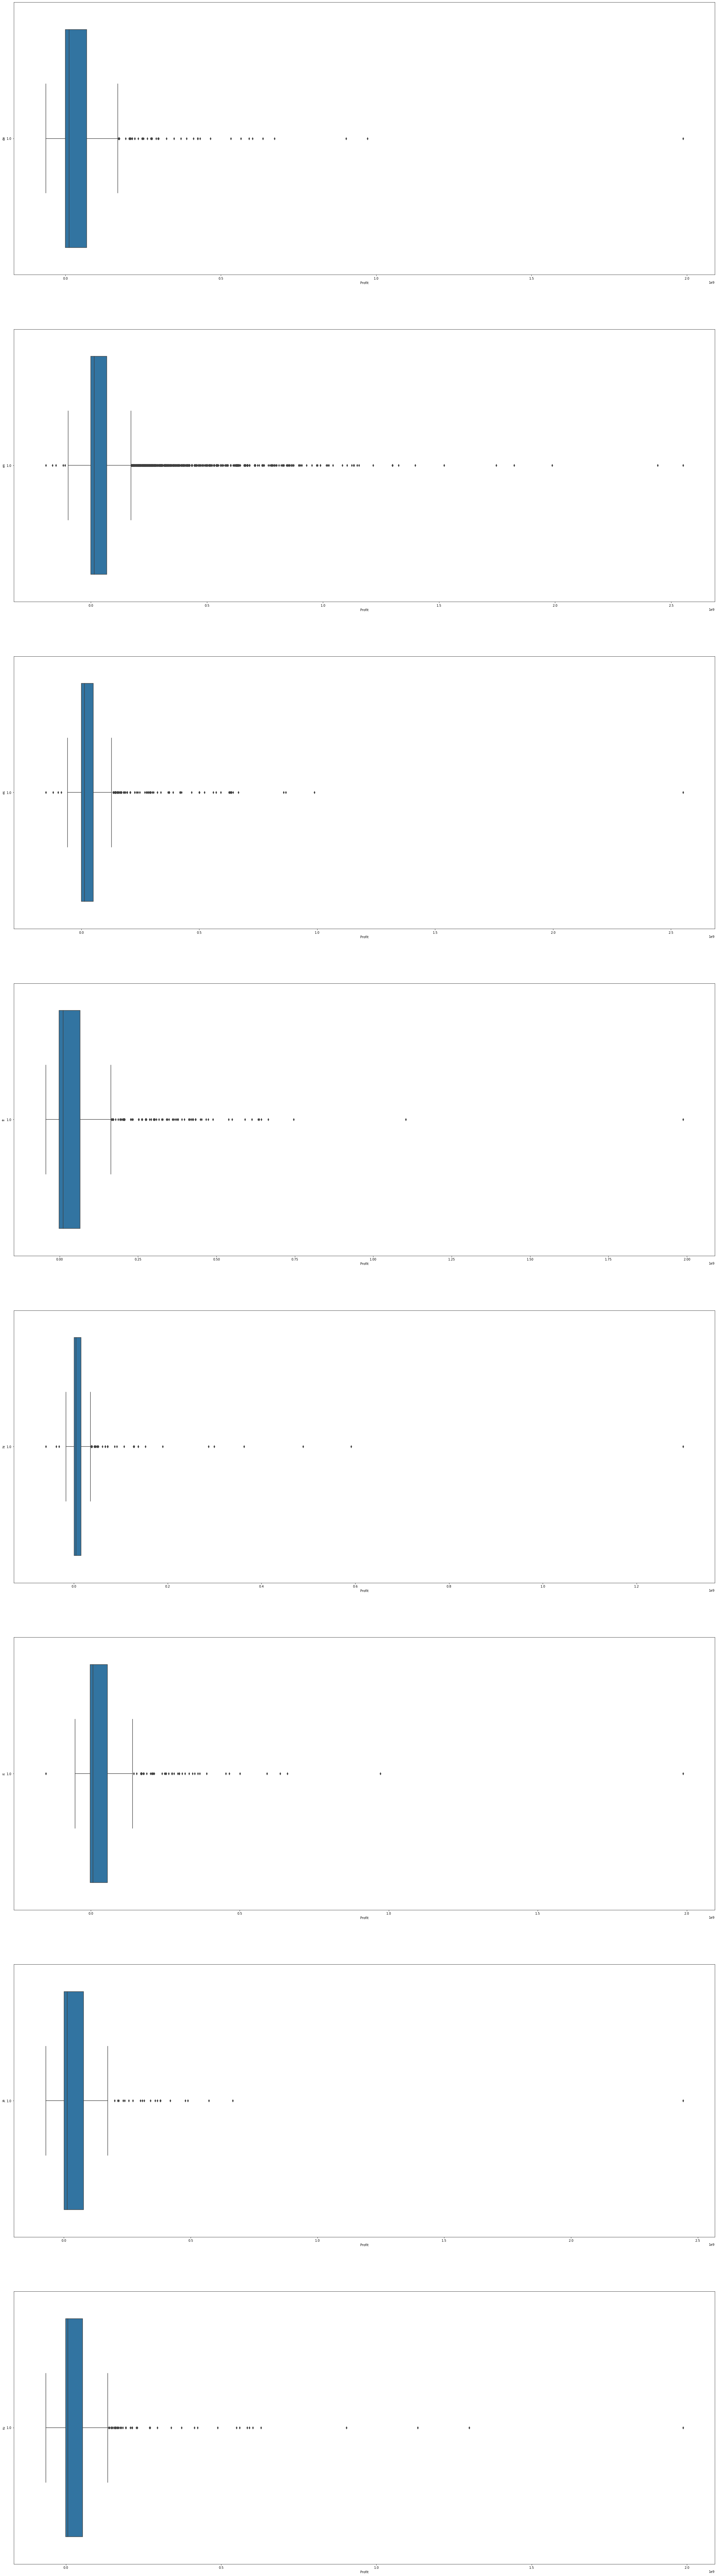

In [38]:
f, axes = plt.subplots(len(SpoLang.columns)-2, 1, figsize=(40, 150))
count = 0
for var in SpoLang.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = SpoLang[var], x = SpoLang['Profit'], orient = "h", ax = axes[count])
    count+=1

In [39]:
df4 = SpoLang.melt(id_vars=['Year',"Profit"], var_name="SpoLang",value_name="Value")
df4 = df4.sample(frac=0.25,axis='rows')

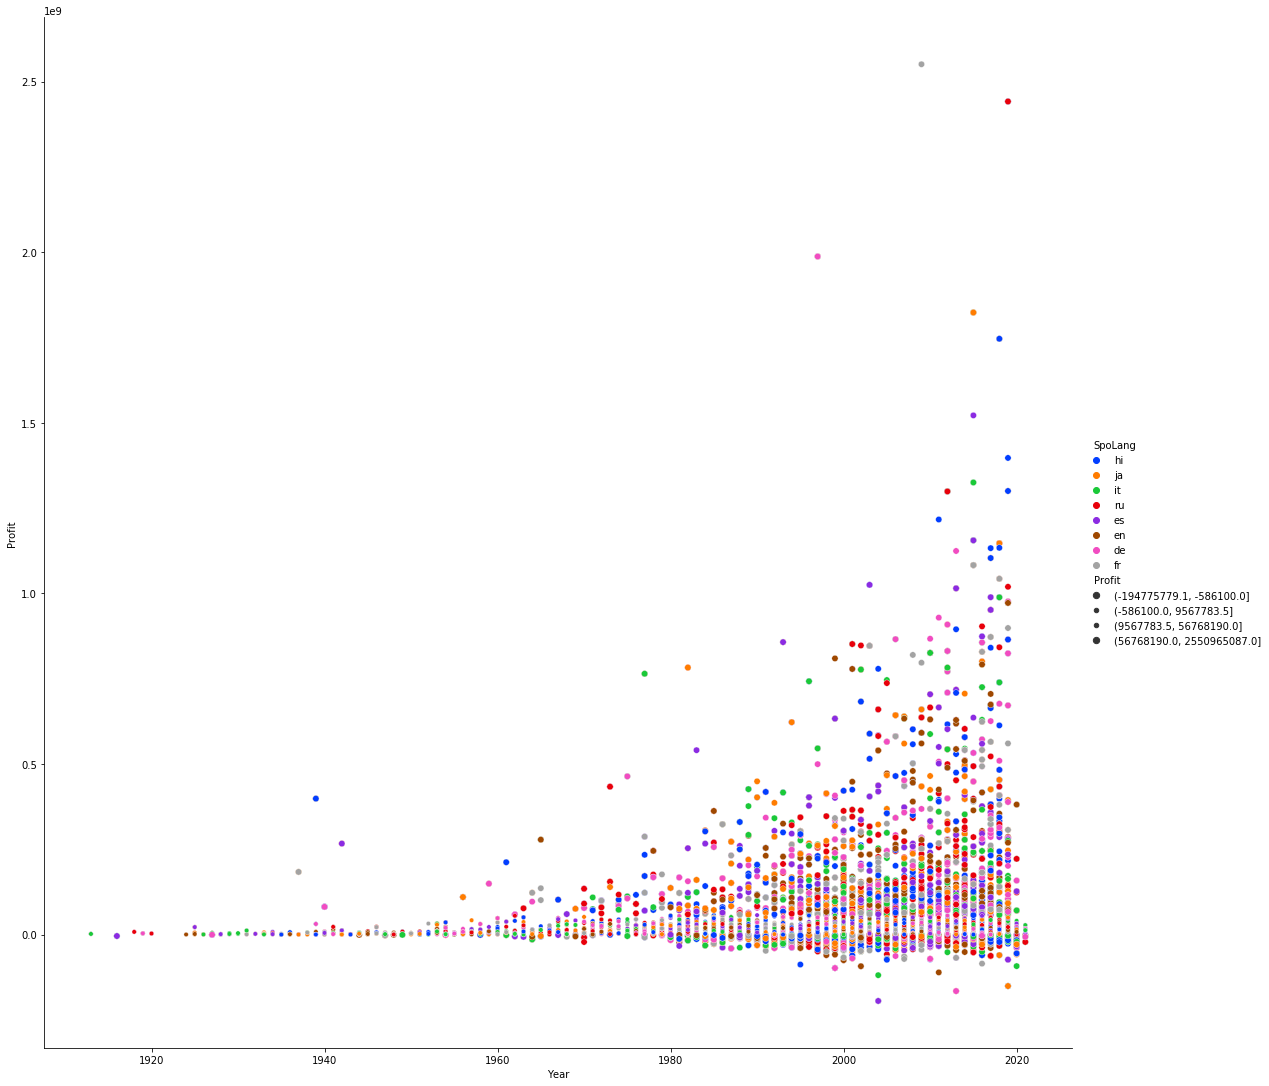

In [40]:
sb.relplot(x=df4['Year'],y=df4['Profit'],hue=df4['SpoLang'], size = pd.qcut(df4["Profit"], 4, precision=1),
           sizes=[40,20,20,40],palette="bright", height = 15)

# Linear Regression on Numeric Data

Response Variable : Profit
    
Predictor Variables : Budget, Popularity, VoteAvg, VoteCount, Revenue, Runtime, Year, Month

In [41]:
# Year, Month

Regression Model :  Total =  𝑎1xBudget + a2xPopularity + a3xVoteAvg + a4xVoteCount + a5xRevenue + a6xRuntime + b 

In [42]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [43]:
# Extract Response and Predictors
y = pd.DataFrame(Movie_CleanedData["Profit"])
X = pd.DataFrame(Movie_CleanedData[['Budget', 'Popularity', 'VoteAvg', 'VoteCount', 'Revenue', 'Runtime', 'Year','Month']])

In [44]:
# Splitting the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, It to Single White Female
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Budget      5034 non-null   int64  
 1   Popularity  5034 non-null   float64
 2   VoteAvg     5034 non-null   float64
 3   VoteCount   5034 non-null   int64  
 4   Revenue     5034 non-null   int64  
 5   Runtime     5034 non-null   float64
 6   Year        5034 non-null   int64  
 7   Month       5034 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 354.0+ KB


In [46]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)

Intercept of Regression 	: b =  [-1.04308128e-07]
Coefficients of Regression 	: a =  [[-1.00000000e+00 -5.58603748e-10  9.96120919e-10  1.57188967e-11
   1.00000000e+00  3.14895989e-11  1.14619561e-11  2.14570694e-10]]


In [48]:
#Printing coefficients against predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

   Predictors  Coefficients
0      Budget -1.000000e+00
1  Popularity -5.586037e-10
2     VoteAvg  9.961209e-10
3   VoteCount  1.571890e-11
4     Revenue  1.000000e+00
5     Runtime  3.148960e-11
6        Year  1.146196e-11
7       Month  2.145707e-10



In [49]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

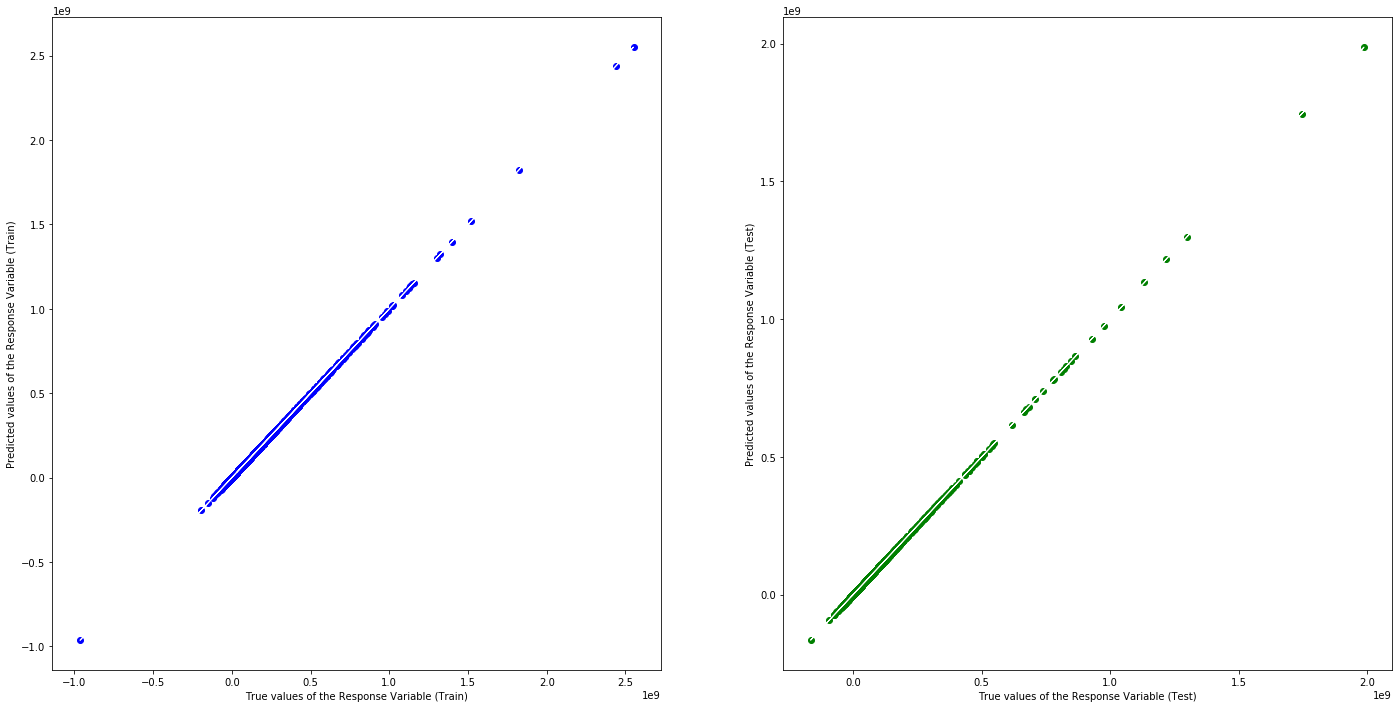

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 2.150157569623721e-14

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.489122979604945e-14




In [50]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

print()

## Preparing Categorical Data for Random Forest

In [51]:
Genre = Movie_CleanedData.GenreList.apply(pd.Series).stack()
Genre = pd.get_dummies(Genre).groupby(level=0).sum()
ProCom = Movie_CleanedData.ProductionCompany.apply(pd.Series).stack()
ProCom = pd.get_dummies(ProCom).groupby(level=0).sum()
ProCoun = Movie_CleanedData.ProductionCountry.apply(pd.Series).stack()
ProCoun = pd.get_dummies(ProCoun).groupby(level=0).sum()
SpoLang = Movie_CleanedData.SpokenLanguage.apply(pd.Series).stack()
SpoLang = pd.get_dummies(SpoLang).groupby(level=0).sum()
ProCom = ProCom.drop(columns=['Others'])
ProCoun = ProCoun.drop(columns=['Others'])
SpoLang = SpoLang.drop(columns=['Others'])
Movie_CleanedData = Movie_CleanedData.drop(columns=['Overview','Tagline','ReleaseDate','OriginalLanguage'])
Movie_CleanedData =pd.concat([Movie_CleanedData, Genre], axis=1)
Movie_CleanedData = pd.concat([Movie_CleanedData, ProCom], axis=1)
Movie_CleanedData = pd.concat([Movie_CleanedData, SpoLang], axis=1)
Movie_CleanedData = pd.concat([Movie_CleanedData, ProCoun], axis=1)
Movie_CleanedData = Movie_CleanedData.drop(columns=['GenreList','ProductionCompany','ProductionCountry','SpokenLanguage'])
Movie_CleanedData = Movie_CleanedData.rename(columns={"de":"Deutschland ","en": "English","es": "Spanish","fr":"French ","hi":"Hindi","it":"Italian","ja":"Japanese","ru":"Russian ","CA":"Canada","DE":"Germany","ES":"Spain","FR":"France","GB":"Britain","IN":"India","IT":"Italy","US":"America"})
Movie_CleanedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6712 entries, Avengers: Endgame to Bacalaureat
Data columns (total 48 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adult            6712 non-null   bool   
 1   Budget           6712 non-null   int64  
 2   Popularity       6712 non-null   float64
 3   VoteAvg          6712 non-null   float64
 4   VoteCount        6712 non-null   int64  
 5   Revenue          6712 non-null   int64  
 6   Profit           6712 non-null   int64  
 7   Runtime          6712 non-null   float64
 8   Year             6712 non-null   int64  
 9   Month            6712 non-null   int64  
 10  Action           6712 non-null   uint8  
 11  Adventure        6712 non-null   uint8  
 12  Animation        6712 non-null   uint8  
 13  Comedy           6712 non-null   uint8  
 14  Crime            6712 non-null   uint8  
 15  Documentary      6712 non-null   uint8  
 16  Drama            6712 non-null   uint8  
 

In [56]:
from sklearn.preprocessing import StandardScaler
X = Movie_CleanedData.iloc[:, 0:4].values
y = Movie_CleanedData.iloc[:, 4].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets